In [2]:
import numpy as np
import pandas as pd
import os
import matplotlib
%matplotlib inline

In [11]:
if not os.path.isfile('properties.p'):
    df = pd.read_csv('../input/properties_2016.csv')
else:
    df = pd.read_pickle('properties.p')

c:\Users\weixi51\AppData\Local\Continuum\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (22,32,34,49,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
objects = df.select_dtypes(include=['object'])

In [4]:
objects.columns

Index([u'hashottuborspa', u'propertycountylandusecode', u'propertyzoningdesc',
       u'fireplaceflag', u'taxdelinquencyflag'],
      dtype='object')

In [7]:
num_rows = df.shape[0]
nulls = df.apply(lambda v: np.sum(pd.isnull(v)))

In [10]:
nulls = nulls/num_rows

In [11]:
nulls

parcelid                        0.000000
airconditioningtypeid           0.728154
architecturalstyletypeid        0.997970
basementsqft                    0.999455
bathroomcnt                     0.003840
bedroomcnt                      0.003836
buildingclasstypeid             0.995769
buildingqualitytypeid           0.350637
calculatedbathnbr               0.043183
decktypeid                      0.994273
finishedfloor1squarefeet        0.932093
calculatedfinishedsquarefeet    0.018613
finishedsquarefeet12            0.092467
finishedsquarefeet13            0.997430
finishedsquarefeet15            0.936086
finishedsquarefeet50            0.932093
finishedsquarefeet6             0.992630
fips                            0.003831
fireplacecnt                    0.895272
fullbathcnt                     0.043183
garagecarcnt                    0.704120
garagetotalsqft                 0.704120
hashottuborspa                  0.976881
heatingorsystemtypeid           0.394885
latitude        

create when bathroom < 1
create when calculatedfinishedsquarefeet < 200
create when calculatedfinishedsquarefeet > 6000

In [23]:
create_missing = ['bathroomcnt', 'bedroomcnt', 'roomcnt', 'numberofstories', 'censustractandblock',
                  'calculatedfinishedsquarefeet', 'finishedsquarefeet12', 'lotsizesquarefeet', 'yearbuilt', 'garagecarcnt']
fill_zeros = ['hashottuborspa' 'poolcnt', 'taxdelinquencyflag', 'fullbathcnt']
use_average = ['bathroomcnt' , 'bedroomcnt', 'calculatedfinishedsquarefeet', 'finishedsquarefeet12', 'roomcnt', 'yearbuilt',
              'assessmentyear', 'taxamount']

category = ['airconditioningtypeid', 'buildingqualitytypeid','heatingorsystemtypeid',
            'propertylandusetypeid']
get_top_n = ['propertyzoningdesc', 'propertycountylandusecode']

In [27]:
df.loc[pd.isnull(df.calculatedfinishedsquarefeet) & pd.notnull(df.bathroomcnt), ['bathroomcnt']].groupby('bathroomcnt').size()

bathroomcnt
0.0     43881
1.0       140
1.5         6
2.0        53
2.5         1
3.0        21
3.5         1
4.0         6
4.5         1
5.0         5
6.0         3
7.0         1
10.0        1
dtype: int64

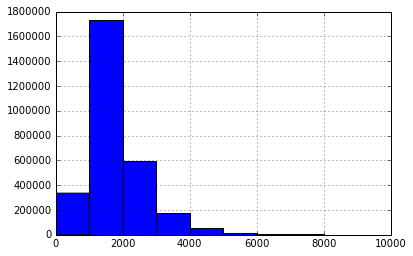

In [62]:
df.calculatedfinishedsquarefeet[(df.calculatedfinishedsquarefeet <10000)].hist()

In [27]:
def check_distr(df, column):
    sizes = df.groupby(column).size()
    the_sum = sizes.sum()
    return sizes.apply(lambda v: float(v)/the_sum).sort_values(ascending=False).head(10)

In [28]:
check_distr(df, 'propertyzoningdesc')

propertyzoningdesc
LAR1       0.139000
LAR3       0.033915
LARS       0.027726
LBR1N      0.026660
LAR2       0.024668
LARD1.5    0.020163
SCUR2      0.015394
LARD2      0.015353
TORR-LO    0.013460
LARA       0.013192
dtype: float64

In [29]:
check_distr(df, 'censustractandblock')

censustractandblock
6.037920e+13    0.000402
6.037137e+13    0.000303
6.037920e+13    0.000279
6.059063e+13    0.000277
6.059052e+13    0.000277
6.037277e+13    0.000275
6.037920e+13    0.000268
6.111007e+13    0.000263
6.037577e+13    0.000259
6.059052e+13    0.000248
dtype: float64

In [30]:
check_distr(df, 'propertycountylandusecode')

propertycountylandusecode
0100    0.388133
122     0.175633
0101    0.083249
010C    0.075821
1111    0.042547
34      0.041457
0200    0.035188
010D    0.020351
1       0.020238
010E    0.017147
dtype: float64